In [61]:
#Este notebook permite analizar los errores en la computación.
#Librerias 
import math as mt
import numpy as np
import matplotlib.pylab as plt 


## Código Escrito correctamente
Código Escrito correctamente

In [62]:
N = 1000   # El número de lineas en un programa.
p = 0.9993 # Probabilidad de que cada linea este correcta 
P = p ** N # Probabilidad total, p1*p2*p3*p4*p5...pN, estadísticamente independientes.

print("La probabilidad de que el codigo este mal escrito es de: {0:.3f}".format(P))

La probabilidad de que el codigo este mal escrito es de: 0.496


In [63]:
a=np.pi
print("The integer value of number is: ", end="")
print(mt.trunc(a))

print("The ceil value of number is: ", end="")
print(mt.ceil(a))

print("The integer value of number is: ", end="")
print(mt.floor(a))


The integer value of number is: 3
The ceil value of number is: 4
The integer value of number is: 3


In [64]:
print("The integral value of number is: ", end="")
print("%.3f" %a)

print("The integral value of number is: ", end="")
print("{0:.3f}".format(a))



print("The integral value of number is: ", end="")
print(round(a,3))


The integral value of number is: 3.142
The integral value of number is: 3.142
The integral value of number is: 3.142


In [65]:
10.0/3

3.3333333333333335

# Errores en la computación

##Objetivo: 
- Entener el \epsilon de la máquina
- Cancelación substractiva
- Analizar los errores de redonde y errores de aproximación en el cálculo de la función sin (x), exp y caos numerico en un mapa logistico
- Realizar una grafica de la funcion sin (x), exp y caos numerico en un mapa logistico

# ## Tipos de errores.

>- ### Blunder or bad theory
Errores tipográficos de entrada, errores en los datos, razonamientos teoricos malos, entre otros. 
>- ### Errores aleatorios.
Impresiones causadas por eventos tales como fluctuaciones electronicas, rayos cósmicos. Se se presentan rara vez, y y tiene una mayor probabilidad de ocurrir cuando los calculos se demoran del orden de semanas. 
>- ### Errores de aproximación: 
Se presentan por truncamiento de los modelos numéricos, por ejemplol si consideramos la serie asociada a la función 
$\sin x$:

\begin{equation}
\sin x = \sum_{n=1}^{\infty} \frac{(-1)^{n-1}x^{2n-1}}{(2n-1)!}
\end{equation}


\begin{equation}
\sin x = \sum_{n=1}^{N} \frac{(-1)^{n-1}x^{2n-1}}{(2n-1)!} + \varepsilon(x, N)
\end{equation}


> El error numérico  en el calculo computacional es del orden de  $\varepsilon(x, N)$, dado que el computador debe truncar la serie en un N determinado.


>- ### Errores de redondeo: 
Análogos a los errores  de  cantidad experimentales, 





Para explicar cada unos de los errores en computación es importante notar
que los  computadores estan construidos en sus estructura más basica con compuertas and, or. Lo que lleva a un presicion finita en la máquina. ¿Cuál es el valor más pequeño que puede procesar un computador?

**Presición de la máquina**

Es el número más pequeno (posible ) x más grande que 1. Para determinarlo 
se puede dividir el número 1 entre 2 (maximo valor del sistema binario),  hasta obtener el minimo valor que puede ser sumado a 1

In [66]:
eps = 1
Nv =  54
for n in range(Nv):
    eps = eps / 2.0
    one = 1. + eps

    print(n, one, eps)


0 1.5 0.5
1 1.25 0.25
2 1.125 0.125
3 1.0625 0.0625
4 1.03125 0.03125
5 1.015625 0.015625
6 1.0078125 0.0078125
7 1.00390625 0.00390625
8 1.001953125 0.001953125
9 1.0009765625 0.0009765625
10 1.00048828125 0.00048828125
11 1.000244140625 0.000244140625
12 1.0001220703125 0.0001220703125
13 1.00006103515625 6.103515625e-05
14 1.000030517578125 3.0517578125e-05
15 1.0000152587890625 1.52587890625e-05
16 1.0000076293945312 7.62939453125e-06
17 1.0000038146972656 3.814697265625e-06
18 1.0000019073486328 1.9073486328125e-06
19 1.0000009536743164 9.5367431640625e-07
20 1.0000004768371582 4.76837158203125e-07
21 1.000000238418579 2.384185791015625e-07
22 1.0000001192092896 1.1920928955078125e-07
23 1.0000000596046448 5.960464477539063e-08
24 1.0000000298023224 2.9802322387695312e-08
25 1.0000000149011612 1.4901161193847656e-08
26 1.0000000074505806 7.450580596923828e-09
27 1.0000000037252903 3.725290298461914e-09
28 1.0000000018626451 1.862645149230957e-09
29 1.0000000009313226 9.31322574615

# *Overflow* y *underflow* 
Desbordamiento aritmético presente cuando un número binario almacenado en un registro supera su valor máximo, es decir, se requiere más bits de los permitidos, este se da con números muy grades o muy pequeños,  
```c
      Overflow }---------------{----0----}--------------{ Overflow
                                underflow
```
El rango de un doble (64 bits) está en el intervalo $10^{-322} < x < 10^{308}$, ósea que
cualquier número fuera de este rango necesita más de 64 bits para ser representado, si $x$ es muy grande hay *overflow* y si es muy pequeño hay *underflow*. La siguiente rutina nos permite calcular el *overflow* multiplicando por 2 y el *underflow* dividiendo por 2,


In [67]:
1.7E307

1.7e+307

In [68]:
1.8E308

inf

In [69]:
# Overflow
large = 2.**1021
for i in range(10):
  large *=2
  print(i, large)

0 4.49423283715579e+307
1 8.98846567431158e+307
2 inf
3 inf
4 inf
5 inf
6 inf
7 inf
8 inf
9 inf


In [70]:
def Over_under():
  i=0.0 
  under = over = 1.0
  
  while i < 1100:
    under = under/2.0
    over = over*2.0
    print (i, under, over)
    i = i+1

  return i
Over_under()


0.0 0.5 2.0
1.0 0.25 4.0
2.0 0.125 8.0
3.0 0.0625 16.0
4.0 0.03125 32.0
5.0 0.015625 64.0
6.0 0.0078125 128.0
7.0 0.00390625 256.0
8.0 0.001953125 512.0
9.0 0.0009765625 1024.0
10.0 0.00048828125 2048.0
11.0 0.000244140625 4096.0
12.0 0.0001220703125 8192.0
13.0 6.103515625e-05 16384.0
14.0 3.0517578125e-05 32768.0
15.0 1.52587890625e-05 65536.0
16.0 7.62939453125e-06 131072.0
17.0 3.814697265625e-06 262144.0
18.0 1.9073486328125e-06 524288.0
19.0 9.5367431640625e-07 1048576.0
20.0 4.76837158203125e-07 2097152.0
21.0 2.384185791015625e-07 4194304.0
22.0 1.1920928955078125e-07 8388608.0
23.0 5.960464477539063e-08 16777216.0
24.0 2.9802322387695312e-08 33554432.0
25.0 1.4901161193847656e-08 67108864.0
26.0 7.450580596923828e-09 134217728.0
27.0 3.725290298461914e-09 268435456.0
28.0 1.862645149230957e-09 536870912.0
29.0 9.313225746154785e-10 1073741824.0
30.0 4.656612873077393e-10 2147483648.0
31.0 2.3283064365386963e-10 4294967296.0
32.0 1.1641532182693481e-10 8589934592.0
33.0 5.82076

1100.0

In [71]:
# La precisión numérica en adición de números grandes
def epsilon_Ngandes():
  eps = 1 # epsilon inicial
  for n in range(1200):
    eps = eps/2.0
    one = 1. + eps
    print(n, one, eps)
 
  return eps

In [72]:
# La precisión numérica en adición de números grandes
def epsilon_Npequenos():
  eps = 1 # epsilon inicial
  for n in range(1200):
    eps = eps/2.0
    one = 1. + eps
    print(n, one, eps)
 
  return eps 


# Tipos de errores.

Errores en la computación:

- ¿Converge la serie?
- ¿Qué tan preciso es la convergencia?
- Costo computacional

>- ### Blunder or bad theory
Errores tipográficos de entrada, errores en los datos, razonamientos teoricos malos, entre otros. 
>- ### Errores aleatorios.
Impresiones causadas por eventos tales como fluctuaciones electronicas, rayos cósmicos. Se presentan rara vez, y y tiene una mayor probabilidad de ocurrir cuando los calculos se demoran del orden de semanas. 
>- ### Errores de aproximación: 
Se presentan por truncamiento de los modelos numéricos, por ejemplol si consideramos la serie asociada a la función 
$\sin x$:

\begin{equation}
\sin x = \sum_{n=1}^{\infty} \frac{(-1)^{n-1}x^{2n-1}}{(2n-1)!}
\end{equation}


\begin{equation}
\sin x = \sum_{n=1}^{N} \frac{(-1)^{n-1}x^{2n-1}}{(2n-1)!} + \varepsilon(x, N)
\end{equation}


> El error numérico  en el calculo computacional es del orden de  $\varepsilon(x, N)$, dado que el computador debe truncar la serie en un N determinado.


>- ### Errores de redondeo: 
Análogos a los errores  de  cantidad experimentales.


# Errores de redondeo: 
## Cancelacion substractiva

Sea $b_c = b (1+ \epsilon)$ y Sea $c_c = c (1+ \epsilon)$ La representacion de un número por el computador. La representación de dos números diferentes en  el computador. Calculemos la diferencia entre estos dos números: 


$a_c = (b-c) + b\epsilon_b -c\epsilon_c = a+ b\epsilon_b -c\epsilon_c$ 

$\frac{a_c}{a} = 1 + \frac{b}{a}\epsilon_b -\frac{c}{a}\epsilon_c $ 

$\frac{a_c}{a} = 1 + \frac{b}{a} \max(\epsilon_b,\epsilon_c) $ 

Si $b\approx c$, el valor de a es un valor muy grande. 





In [73]:
print(np.float32(1.11000) - np.float32(1.11001))
print(np.float64(1.11000) - np.float64(1.11001))

-1.001358e-05
-9.999999999843467e-06


## Errores de acumulación 
$\epsilon_{ro}=\sqrt{N}\epsilon_m$


In [81]:
#Con numeros de 32 bit.
eps = np. float64(0)
N = 1000000
for i in range(0, N): 
 eps = np.float64(0.1) + eps

exac = N*0.1
error = np.abs(exac-eps) / exac
print("Valor a través de la suma: ", eps)
print("Valor exacto: ",  exac)
print("Error ", error*100 )
#¿Qué pasa si empleamos numeros de 64 bits?

Valor a través de la suma:  100000.00000133288
Valor exacto:  100000.0
Error  1.3328826753422618e-09


In [82]:
10.0/3

3.3333333333333335


## Errores de aproximación.
 $\epsilon_{aprox}=\frac{\alpha}{N^{\beta}}$


## Error total: 
 $\epsilon_{aprox} = \epsilon_{ro}+\epsilon_{aprox}$



# Realizar  el calculo de la funcion sin(x) empleando la serie: 

\begin{equation}
\sin(x) = \sum_{i=1} ^ N (-1)^{n+1} \frac{x^{2n-1}} {(2n-1)!}
\end{equation}


In [ ]:
#n-esimo termino de la serie de Taylor del sin de x

def _sin(x, n):
  num = (-1) ** (n + 1) * x ** (2 * n - 1)  #Calculo del numerador
  den = mt.factorial(2 * n - 1)             #calculo del denominador
  
  return num/den             

#ESte rutina realiza  el calculo de la funcion sin, para el funcionamiento 
#adecuado de la rutina es necesario ingresar el valor x a calcular y el numero 
#de terminos de la serie de Taylor que se desean 
def ite_sin(x, N):  
  suma = 0                          # Inicializacion de la suma   
  for i in range(1, N ):            # Suma de los N terminos   
    suma = _sin(x, i) + suma  
  return suma


In [ ]:
#Calculo de la funcion sinx en comparacion con la función computada con la serie de Taylor
x = np.linspace(0, 2*np.pi, 100)
y_teorico = np.sin(x)     #Cálculo de la función teórica 
y_comp = ite_sin(x = x , N = 7 )  #Cálculo de la función empleando series de Taylor  


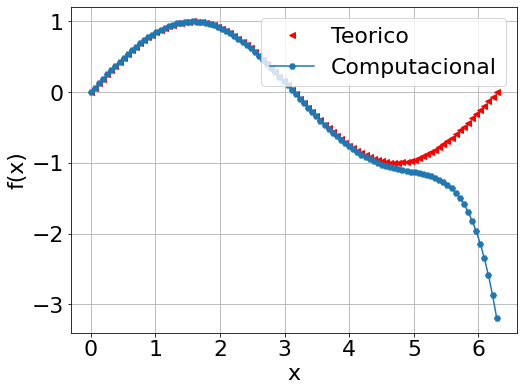

In [ ]:
plt.figure(figsize = (8, 6))        #define la figura y el tamaño de esta-

plt.plot(x,y_teorico, "r<",  label= "Teorico") #graficacion x, y
plt.plot(x,y_comp, "H-", label= "Computacional")

plt.xlabel("x", fontsize = 22)    #nombre de eje x con su tamaño 
plt.ylabel("f(x)", fontsize = 22) #nombre de eje y con su tamaño 

plt.xticks(fontsize = 22 ) #tamaño de los numeros  en x
plt.yticks(fontsize = 22 ) #tamaño de los numeros  en y

plt.legend(fontsize = 22, loc = 1) 
plt.grid()
#plt.savefig("graph1.pdf")  #almacenar la figura  en formato pdf
#plt.savefig("graph1.png", pdi = 200) #almacenar la figura  en formato png
#plt.savefig("abc.png")
#files.download("graph1.png")    #Exportar archivo del drive
plt.show()





In [ ]:
#Estudio de convergencia de la serie
x = 0.5
t = np.sin(x)
Nesimo = np.arange(4, 51, 1)

In [ ]:
y = []
error = []
for i in Nesimo:
  val = ite_sin(x = x, N = i )
  y.append(val)
  e = np.fabs(val - t)/t
  error.append(e)
# Analisis respecto al valor teorico. 
# En general hay que realizar comparaciones respecto a las iteraciones que se van realizando.


Text(0, 0.5, 'Error')

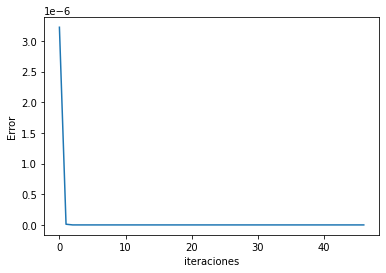

In [ ]:
plt.plot(error)
plt.xlabel("iteraciones")
plt.ylabel("Error")


## Exponencial, serie alternante (serieEn)
Objetivo: Analizar el uso de la cancelación substractiva


Copia textual del libro  [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

- Write a program that calculates $e^{-x}$ 

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}


- Calculate your series for $x \le 1$ and compare it to the built-in function
exp(x) (you may assume that the built-in exponential function is exact).
You should pick an N for which the next term in the series is no more
than $10^{-7}$ of the sum up to that point

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}

- Examine the terms in the series for $x\approx 10$ and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation
at $n \approx x − 1$.

- See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff errors

- By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges

- Make a series of graphs of the error versus N for different values of x.

In [84]:
x=0.2
np.exp(-x)

0.8187307530779818

In [ ]:
def exp_serie(x, N):
  for i in range(0, N)
    
  return e


